In [53]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier, BaggingClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from mlxtend.classifier import StackingClassifier

In [54]:
df = pd.read_csv('/kaggle/input/asthma-disease-dataset/asthma_disease_data.csv')

In [55]:
df.head(5)

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,PhysicalActivity,DietQuality,SleepQuality,...,LungFunctionFEV1,LungFunctionFVC,Wheezing,ShortnessOfBreath,ChestTightness,Coughing,NighttimeSymptoms,ExerciseInduced,Diagnosis,DoctorInCharge
0,5034,63,0,1,0,15.848744,0,0.894448,5.488696,8.701003,...,1.369051,4.941206,0,0,1,0,0,1,0,Dr_Confid
1,5035,26,1,2,2,22.757042,0,5.897329,6.341014,5.153966,...,2.197767,1.702393,1,0,0,1,1,1,0,Dr_Confid
2,5036,57,0,2,1,18.395396,0,6.739367,9.196237,6.840647,...,1.698011,5.022553,1,1,1,0,1,1,0,Dr_Confid
3,5037,40,1,2,1,38.515278,0,1.404503,5.826532,4.253036,...,3.032037,2.300159,1,0,1,1,1,0,0,Dr_Confid
4,5038,61,0,0,3,19.283802,0,4.604493,3.127048,9.625799,...,3.470589,3.067944,1,1,1,0,0,1,0,Dr_Confid


In [56]:
df.isnull().sum()

PatientID                 0
Age                       0
Gender                    0
Ethnicity                 0
EducationLevel            0
BMI                       0
Smoking                   0
PhysicalActivity          0
DietQuality               0
SleepQuality              0
PollutionExposure         0
PollenExposure            0
DustExposure              0
PetAllergy                0
FamilyHistoryAsthma       0
HistoryOfAllergies        0
Eczema                    0
HayFever                  0
GastroesophagealReflux    0
LungFunctionFEV1          0
LungFunctionFVC           0
Wheezing                  0
ShortnessOfBreath         0
ChestTightness            0
Coughing                  0
NighttimeSymptoms         0
ExerciseInduced           0
Diagnosis                 0
DoctorInCharge            0
dtype: int64

In [57]:
df.columns

Index(['PatientID', 'Age', 'Gender', 'Ethnicity', 'EducationLevel', 'BMI',
       'Smoking', 'PhysicalActivity', 'DietQuality', 'SleepQuality',
       'PollutionExposure', 'PollenExposure', 'DustExposure', 'PetAllergy',
       'FamilyHistoryAsthma', 'HistoryOfAllergies', 'Eczema', 'HayFever',
       'GastroesophagealReflux', 'LungFunctionFEV1', 'LungFunctionFVC',
       'Wheezing', 'ShortnessOfBreath', 'ChestTightness', 'Coughing',
       'NighttimeSymptoms', 'ExerciseInduced', 'Diagnosis', 'DoctorInCharge'],
      dtype='object')

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


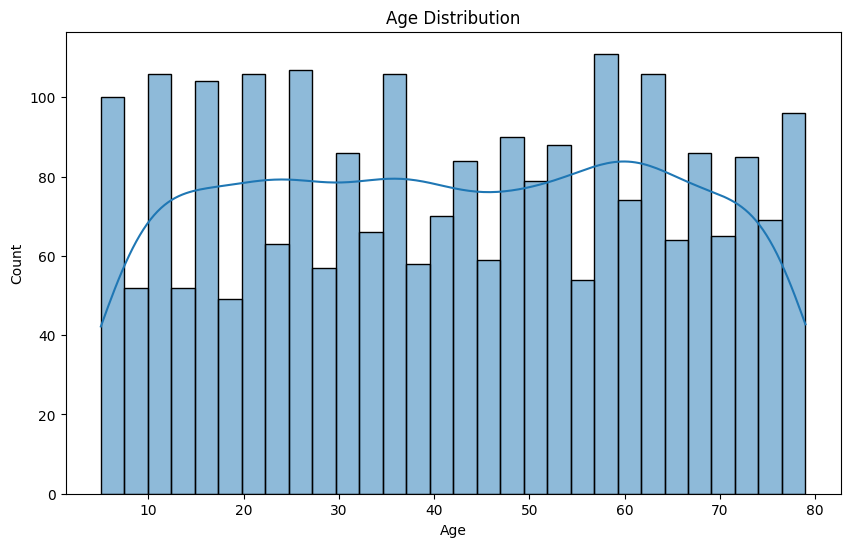

In [58]:
# Age distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], kde=True, bins=30)
plt.title('Age Distribution')
plt.show()

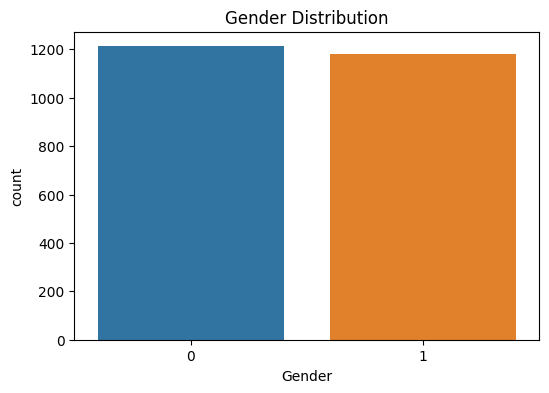

In [59]:
# Gender distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='Gender', data=df)
plt.title('Gender Distribution')
plt.show()

In [60]:
# Dropping 'PatientID' and 'DoctorInCharge' as they are not useful for modeling
df.drop(['PatientID', 'DoctorInCharge'], axis=1, inplace=True)

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Distribution of BMI')

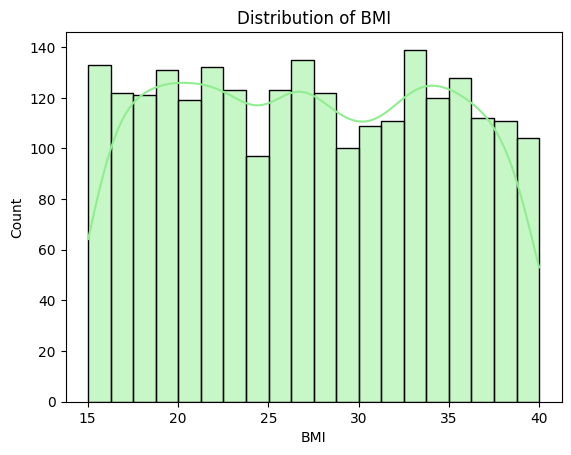

In [61]:
sns.histplot(df['BMI'], bins=20, kde=True, color='lightgreen')
plt.title('Distribution of BMI')

Text(0, 0.5, 'FEV1')

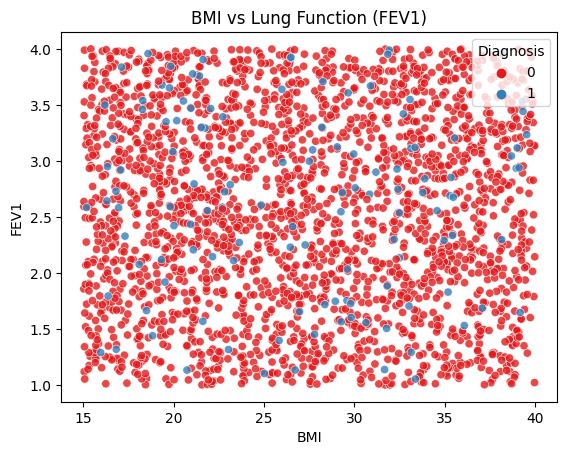

In [62]:
sns.scatterplot(x='BMI', y='LungFunctionFEV1', data=df, hue='Diagnosis', palette='Set1', alpha=0.8)
plt.title('BMI vs Lung Function (FEV1)')
plt.xlabel('BMI')
plt.ylabel('FEV1')

Text(0.5, 1.0, 'Ethnicity Distribution')

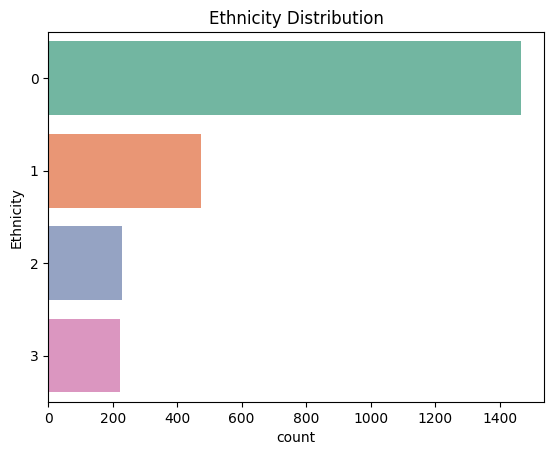

In [63]:
sns.countplot(y='Ethnicity', data=df, palette='Set2', order=df['Ethnicity'].value_counts().index)
plt.title('Ethnicity Distribution')

Text(0, 0.5, 'FEV1')

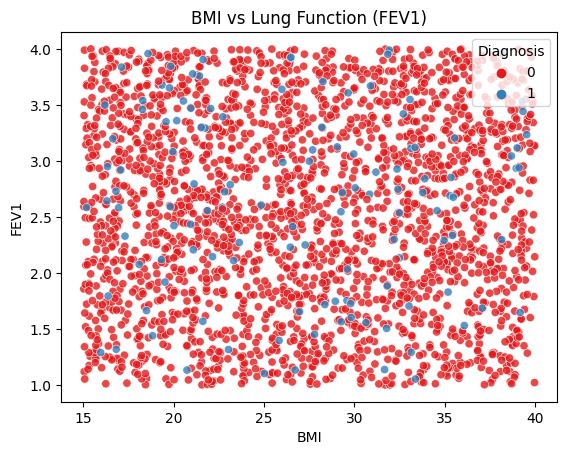

In [64]:
sns.scatterplot(x='BMI', y='LungFunctionFEV1', data=df, hue='Diagnosis', palette='Set1', alpha=0.8)
plt.title('BMI vs Lung Function (FEV1)')
plt.xlabel('BMI')
plt.ylabel('FEV1')

Text(0.5, 1.0, 'Age vs Smoking Status')

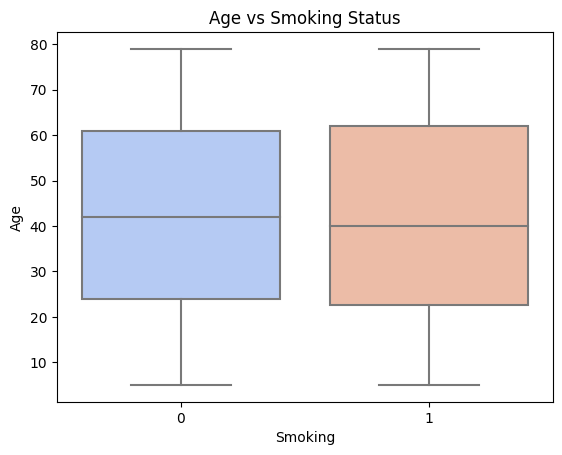

In [65]:
sns.boxplot(x='Smoking', y='Age', data=df, palette='coolwarm')
plt.title('Age vs Smoking Status')

Text(0.5, 1.0, 'Education Level Distribution')

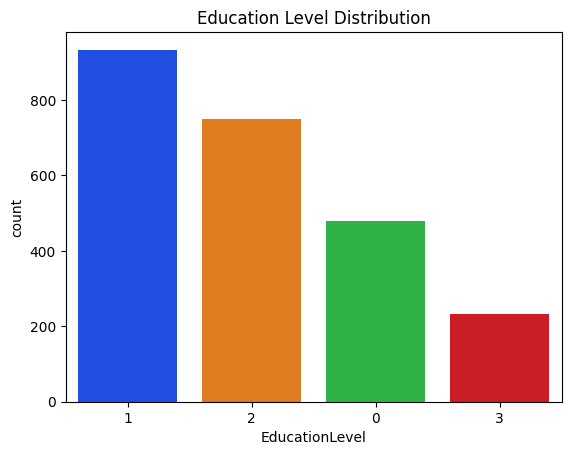

In [66]:
sns.countplot(x='EducationLevel', data=df, palette='bright', order=df['EducationLevel'].value_counts().index)
plt.title('Education Level Distribution')

Text(0.5, 1.0, 'Family History of Asthma')

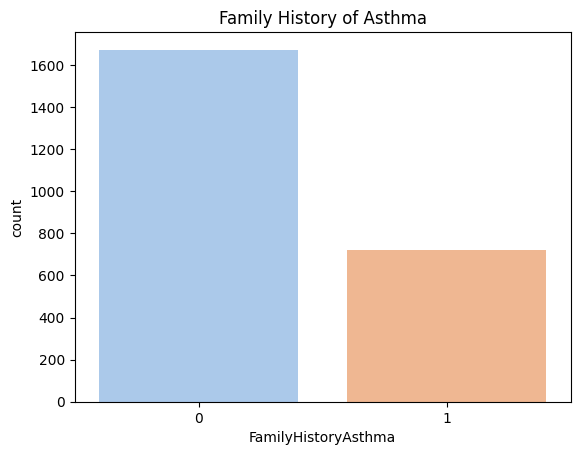

In [67]:
sns.countplot(x='FamilyHistoryAsthma', data=df, palette='pastel')
plt.title('Family History of Asthma')

Text(0, 0.5, 'Physical Activity')

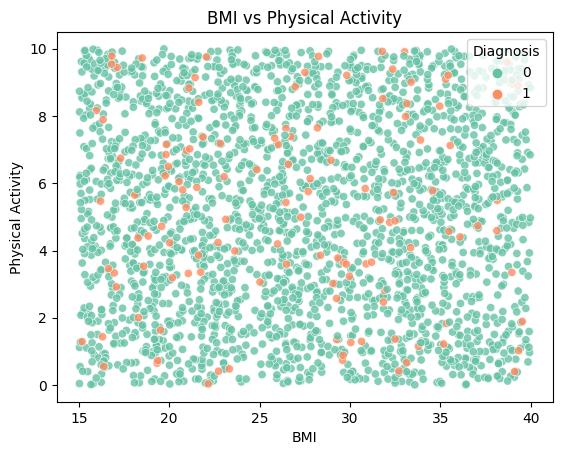

In [68]:
sns.scatterplot(x='BMI', y='PhysicalActivity', data=df, hue='Diagnosis', palette='Set2', alpha=0.8)
plt.title('BMI vs Physical Activity')
plt.xlabel('BMI')
plt.ylabel('Physical Activity')

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Distribution of Lung Function (FVC)')

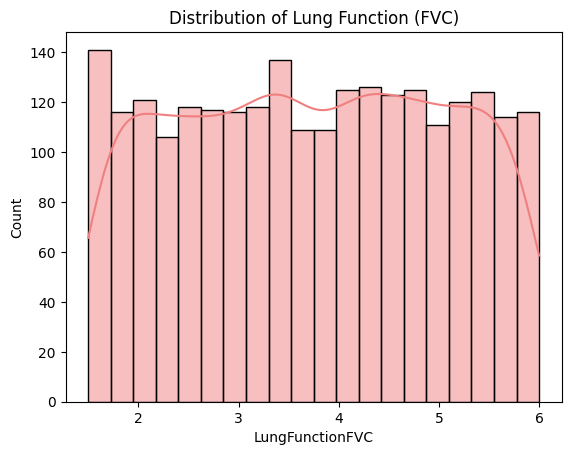

In [69]:
sns.histplot(df['LungFunctionFVC'], bins=20, kde=True, color='lightcoral')
plt.title('Distribution of Lung Function (FVC)')

Text(0.5, 1.0, 'Diagnosis Distribution')

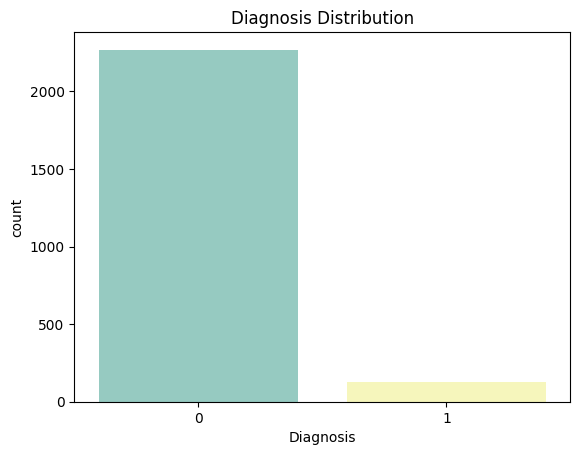

In [70]:
sns.countplot(x='Diagnosis', data=df, palette='Set3')
plt.title('Diagnosis Distribution')

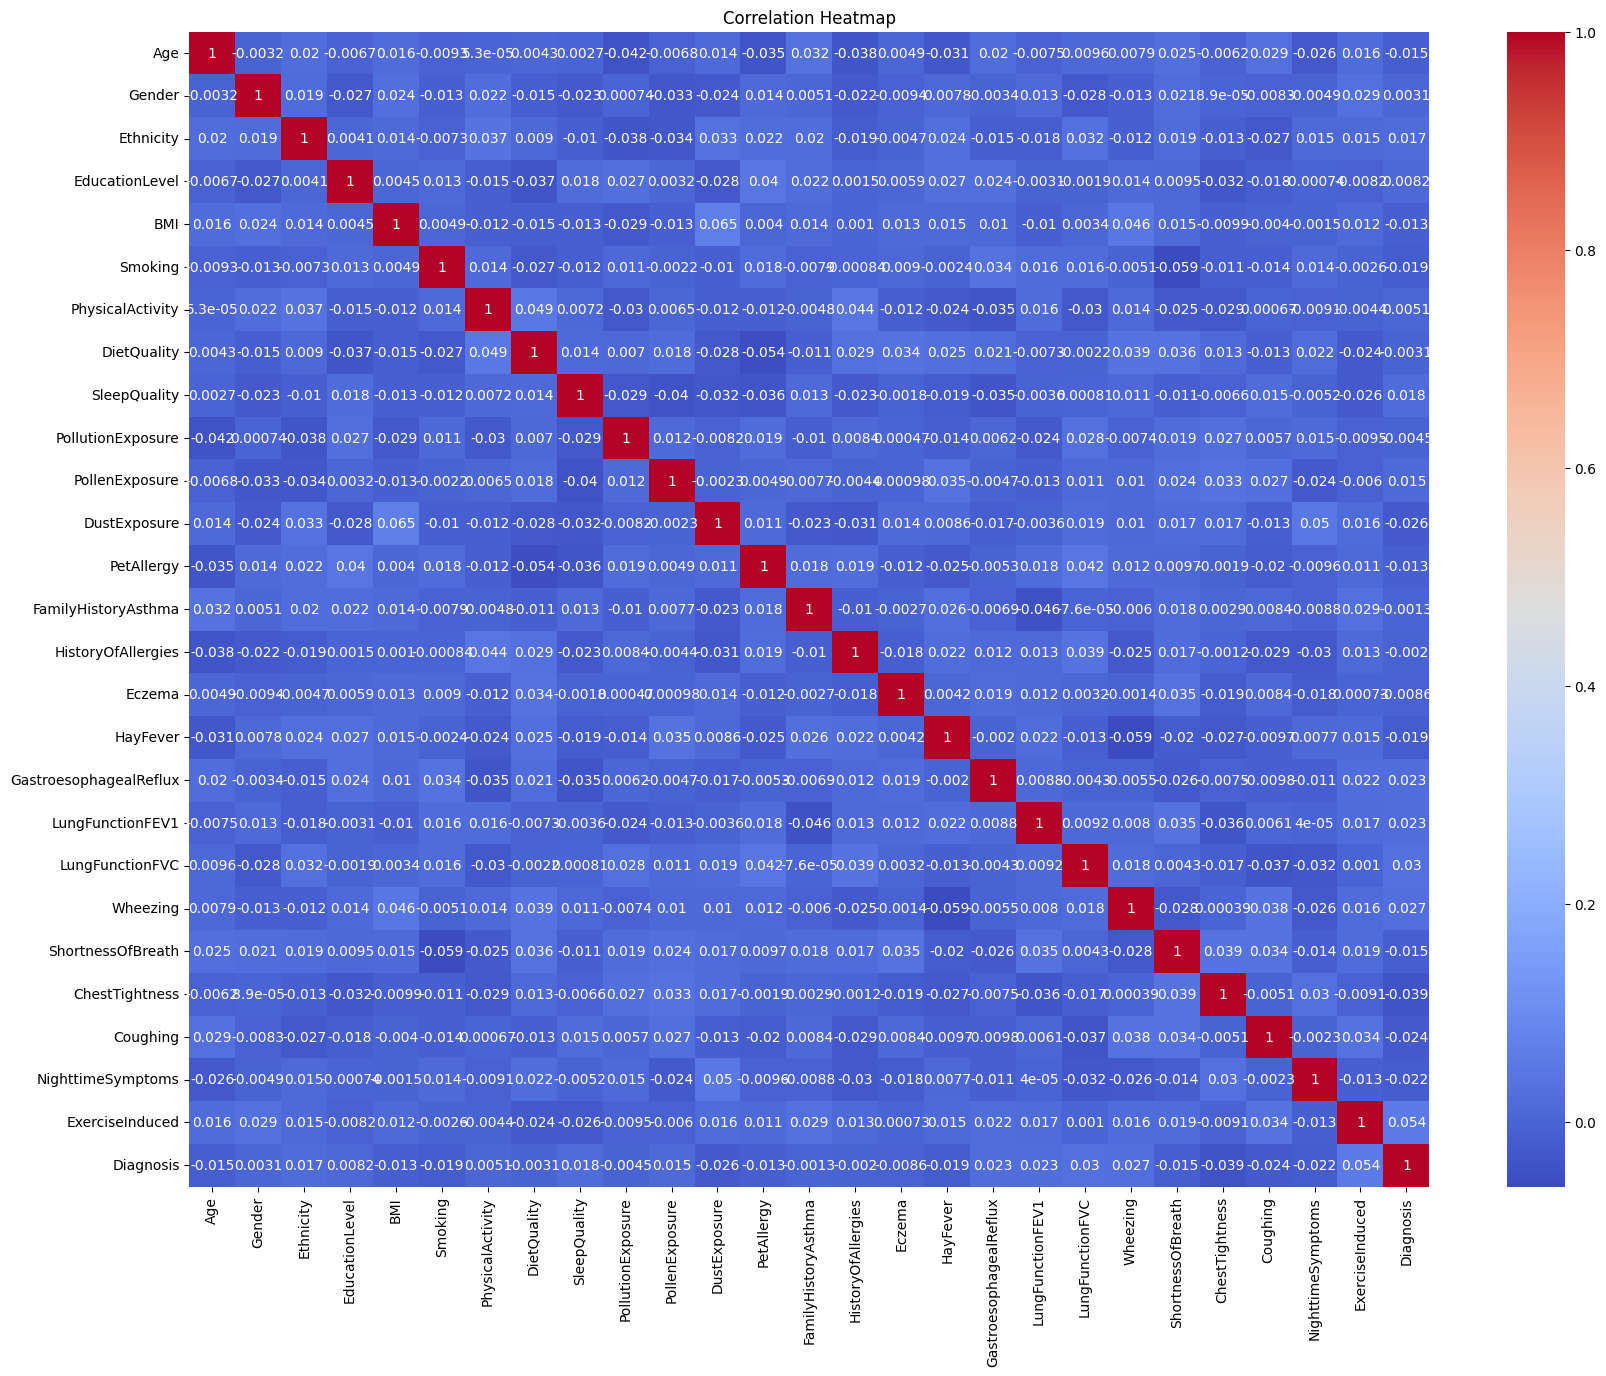

In [71]:
# Correlation heatmap
plt.figure(figsize=(20, 15))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [72]:
# Spliting
X = df.drop('Diagnosis', axis=1)
y = df['Diagnosis']

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [74]:
# Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [75]:
# Adding models
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Support Vector Machine': SVC(probability=True),
    'XGBoost': XGBClassifier(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'Extra Trees': ExtraTreesClassifier(),
    'Bagging': BaggingClassifier(),
    'CatBoost': CatBoostClassifier(verbose=0),
    'LightGBM': LGBMClassifier(),
    'Naive Bayes': GaussianNB(),
    'Decision Tree': DecisionTreeClassifier()
}
# Stacking Classifier
stacking_classifier = StackingClassifier(
    classifiers=[models['Logistic Regression'], models['Random Forest'], models['Gradient Boosting'], models['XGBoost'], models['CatBoost']],
    meta_classifier=LogisticRegression()
)
# Adding Stacking Classifier to the dictionary
models['Stacking Classifier'] = stacking_classifier


0.9519832985386222
0.5225972540045767


/tmp/ipykernel_34/3871269817.py:14: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results = pd.concat([results, new_result], ignore_index=True)


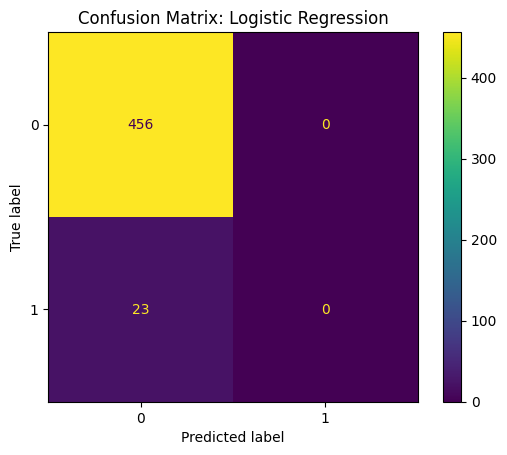

0.9519832985386222
0.3740942028985507


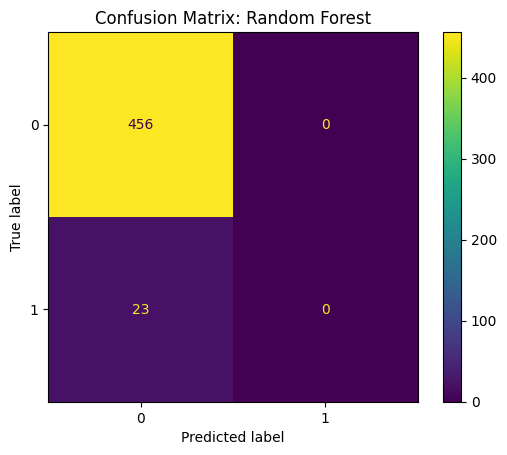

0.9498956158663883
0.43983600305110604


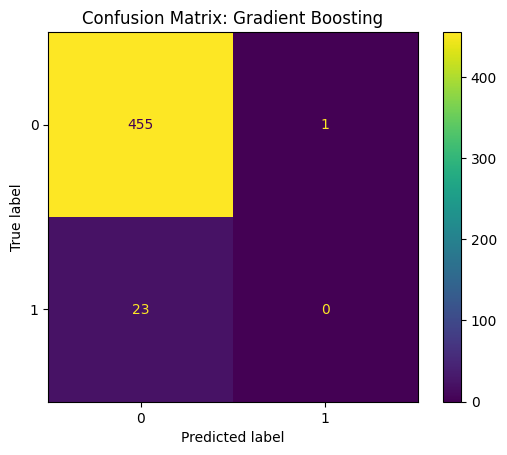

0.9519832985386222
0.5115369946605645


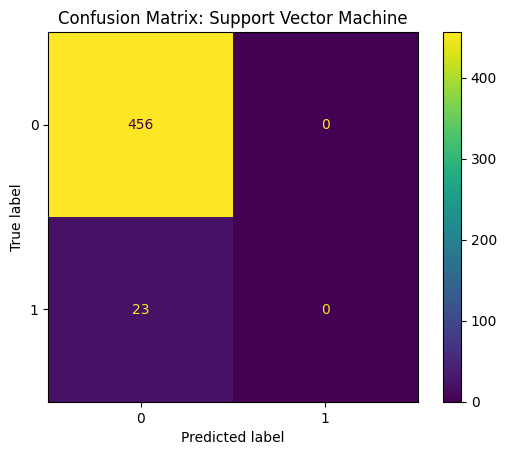

0.9519832985386222
0.4032227307398932


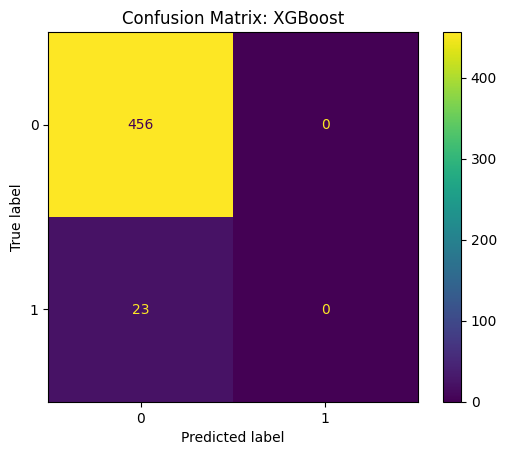

0.9519832985386222
0.5416666666666666


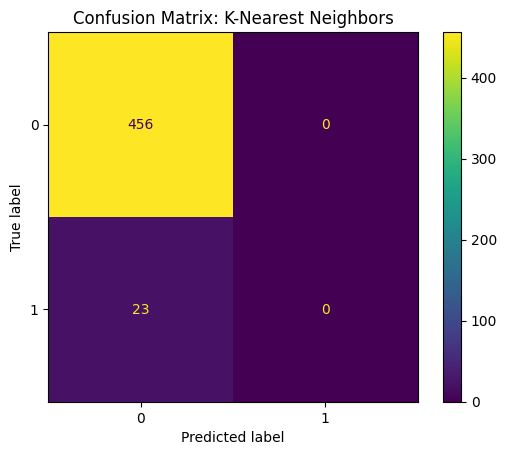

0.9519832985386222
0.4804538520213577


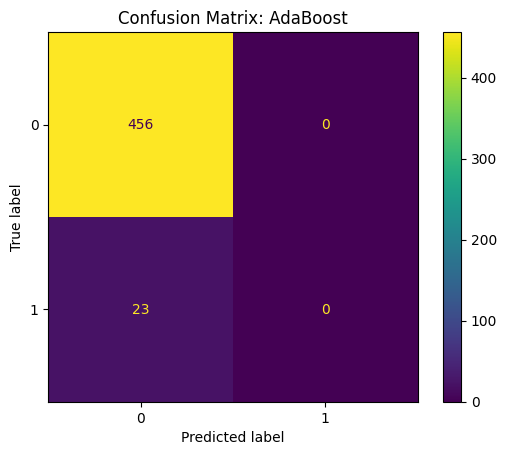

0.9519832985386222
0.48012013729977115


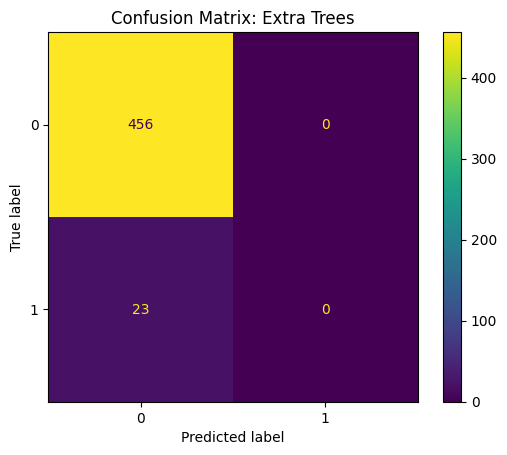

0.9498956158663883
0.4295385202135774


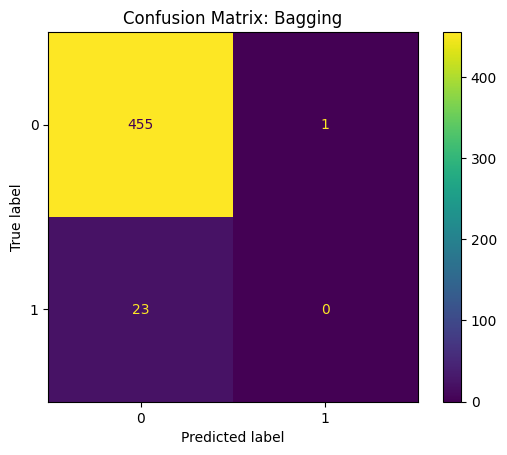

0.9519832985386222
0.4680587337909992


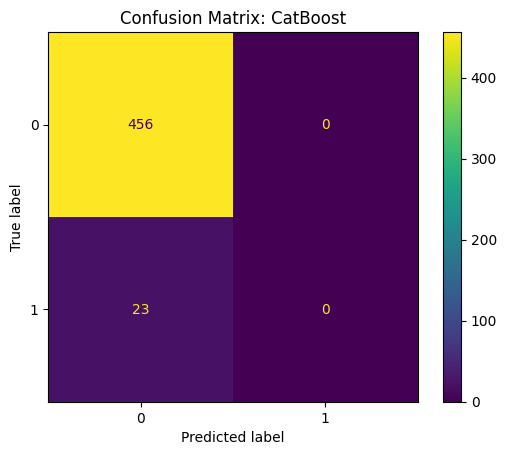

[LightGBM] [Info] Number of positive: 101, number of negative: 1812
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000987 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2423
[LightGBM] [Info] Number of data points in the train set: 1913, number of used features: 26
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.052797 -> initscore=-2.887066
[LightGBM] [Info] Start training from score -2.887066
0.9519832985386222
0.4597635392829901


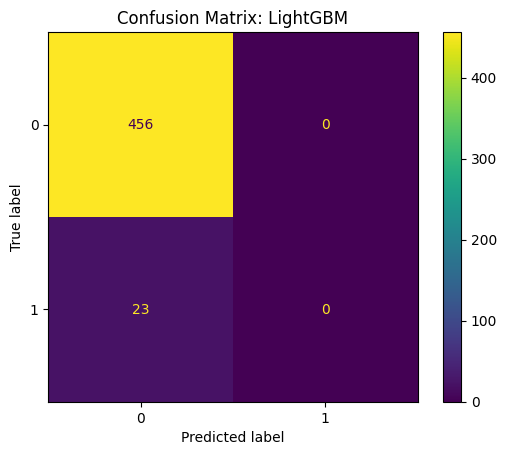

0.9519832985386222
0.5242181540808543


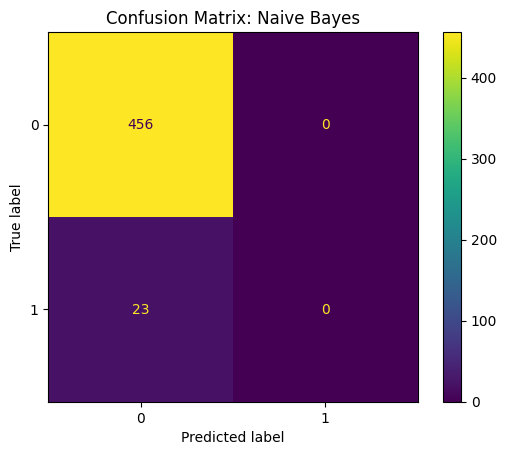

0.8643006263048016
0.4952326468344775


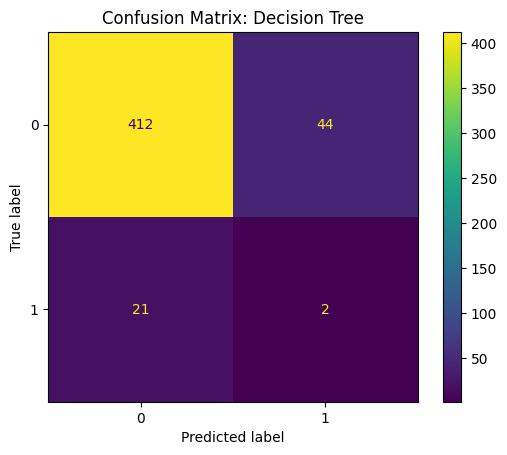

0.9519832985386222
0.49890350877192985


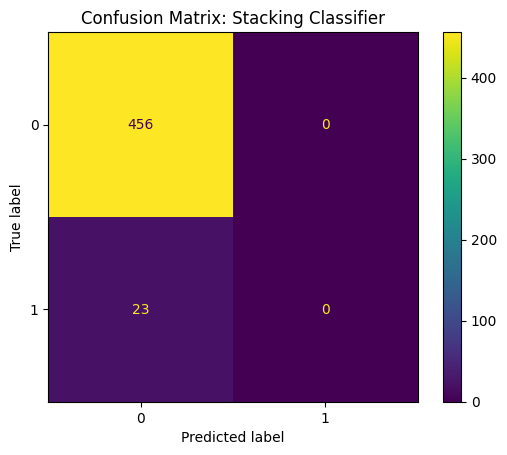

In [76]:
# DataFrame to store the results
results = pd.DataFrame(columns=['Model', 'Accuracy', 'ROC AUC'])
# Training and evaluating each model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    print(accuracy)
    print(roc_auc)
    # Append results to DataFrame
    new_result = pd.DataFrame({'Model': [name], 'Accuracy': [accuracy], 'ROC AUC': [roc_auc]})
    results = pd.concat([results, new_result], ignore_index=True)
    # Plot confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    plt.title(f'Confusion Matrix: {name}')
    plt.savefig(f'confusion_matrix_{name}.png')
    plt.show()
# Save results to CSV
results.to_csv('model_results.csv', index=False)

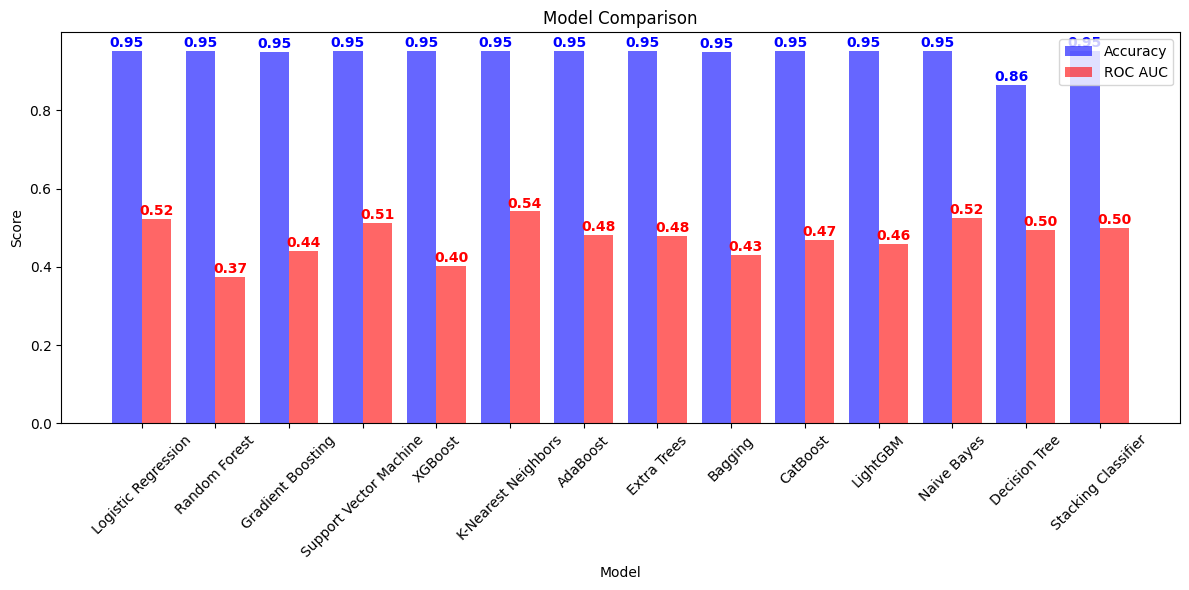

In [77]:
# Plotting training and testing comparison
fig, ax = plt.subplots(figsize=(12, 6))
# Bar plots for Accuracy and ROC AUC
width = 0.4
x = range(len(results['Model']))
ax.bar(x, results['Accuracy'], width=width, color='blue', alpha=0.6, label='Accuracy', align='center')
ax.bar([p + width for p in x], results['ROC AUC'], width=width, color='red', alpha=0.6, label='ROC AUC', align='center')
# Adding the values on top of the bars
for i in x:
    ax.text(i, results['Accuracy'][i] + 0.01, f'{results["Accuracy"][i]:.2f}', ha='center', color='blue', fontweight='bold')
    if pd.notnull(results['ROC AUC'][i]):
        ax.text(i + width, results['ROC AUC'][i] + 0.01, f'{results["ROC AUC"][i]:.2f}', ha='center', color='red', fontweight='bold')
# Customizing the plot
ax.set_xlabel('Model')
ax.set_ylabel('Score')
ax.set_title('Model Comparison')
ax.set_xticks([p + width / 2 for p in x])
ax.set_xticklabels(results['Model'], rotation=45)
ax.legend()
plt.tight_layout()
plt.savefig('model_comparison.png')
plt.show()